In [132]:
!pwd

/c/Users/andreaguiar/Desktop/usr/temp


In [1]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
from tqdm.auto import tqdm

In [125]:
url_chiclete = 'https://www.vagalume.com.br/chiclete-com-banana/'
response = requests.get(url_chiclete)


soup = BeautifulSoup(response.content)

musicas_chiclete = [ 'https://www.vagalume.com.br' + song['href'] 
                        for song in soup.find_all('a', attrs={'class': "nameMusic"})]

musicas_chiclete

['https://www.vagalume.com.br/chiclete-com-banana/vem.html',
 'https://www.vagalume.com.br/chiclete-com-banana/deixa-meu-amor-te-levar.html',
 'https://www.vagalume.com.br/chiclete-com-banana/sementes.html',
 'https://www.vagalume.com.br/chiclete-com-banana/nao-vou-chorar.html',
 'https://www.vagalume.com.br/chiclete-com-banana/contando-as-horas.html',
 'https://www.vagalume.com.br/chiclete-com-banana/grito-de-guerra-2.html',
 'https://www.vagalume.com.br/chiclete-com-banana/que-forca-e-essa.html',
 'https://www.vagalume.com.br/chiclete-com-banana/100-voce.html',
 'https://www.vagalume.com.br/chiclete-com-banana/eu-fui-atras-de-um-caminhao.html',
 'https://www.vagalume.com.br/chiclete-com-banana/menina-me-da-seu-amor.html',
 'https://www.vagalume.com.br/chiclete-com-banana/diga-que-valeu.html',
 'https://www.vagalume.com.br/chiclete-com-banana/bem-vindo-ao-mar.html',
 'https://www.vagalume.com.br/chiclete-com-banana/selva-branca.html',
 'https://www.vagalume.com.br/chiclete-com-banana/

In [3]:
text = []

for each_song in tqdm(musicas_chiclete):
    response = requests.get(each_song)
    soup = BeautifulSoup(response.content)
    text.append(re.sub('</?br/?>', ' ', soup.find('div', attrs={'id':'lyrics'}).decode_contents()))

In [129]:
len(text)

293

In [4]:
df = pd.DataFrame({'Lyrics':text,
                   'Artist':len(text) * ['chiclete com banana']})

In [5]:
df

,Lyrics,Artist
0,"Ê, ê, ê, ê, ô Ê, ê, ê... ê, ô, ê, ô Vem O amo...",chiclete com banana
1,Vista sua saia bem rodada Com a blusa levantad...,chiclete com banana
2,Semente de cores vivas que acendem novas recor...,chiclete com banana
3,Por que será que tem que ser assim A gente gos...,chiclete com banana
4,Lê lê lê ô na na na uê Não dá pra tirar da c...,chiclete com banana
...,...,...
288,Am E7 O vento faz rende-vous Am No seu cabelo ...,chiclete com banana
289,O sol brilhou No Ylê Aiyê E um lamento ao vent...,chiclete com banana
290,"Orumilá aloja forte O vulgo My God Brother, br...",chiclete com banana
291,Vou lhe mostrar Pra ver como é que é No meu Br...,chiclete com banana


In [6]:
url = 'https://www.vagalume.com.br/roberto-carlos/'
response = requests.get(url)


soup = BeautifulSoup(response.content)

musicas = [ 'https://www.vagalume.com.br' + song['href'] for song in soup.find_all('a', attrs={'class': "nameMusic"})]
# get same number of chiclete songs:
musicas = musicas[:len(musicas_chiclete)]


In [7]:
len(musicas)

293

In [8]:
def get_songs(each_song):
    from bs4 import BeautifulSoup
    import requests
    import re
    
    response = requests.get(each_song)
    soup = BeautifulSoup(response.content)
    try:
        text = re.sub('</?br/?>', ' ', soup.find('div', attrs={'id':'lyrics'}).decode_contents())
    except:
        text = ''
    return text


In [9]:
# paralelizing code:

from multiprocess import Pool
pool = Pool(processes=6)
results = pool.map(get_songs, musicas)


In [10]:
final_df = pd.concat([df,
                      pd.DataFrame({'Lyrics':results,
                                    'Artist':len(results) * ['roberto carlos']})
                      ])

In [47]:
def get_artist(name, n_max=200):
    
    name = name.replace(' ', '-').lower()
    url = 'https://www.vagalume.com.br/' + name
    response = requests.get(url)
    soup = BeautifulSoup(response.content)

    musicas = [ 'https://www.vagalume.com.br' + song['href'] for song in soup.find_all('a', attrs={'class': "nameMusic"})]
    pool = Pool(processes=6)
    results = pool.map(get_songs, musicas)
    data = pd.DataFrame({'Lyrics':results,
                         'Artist':len(results) * [name]})
                        
    return data.sample(min(n_max, data.shape[0]))

In [48]:
final = pd.concat([
    get_artist('Chiclete Com Banana'),
    get_artist('Roberto Carlos'),
    get_artist('Anitta')]
)

In [49]:
final

,Lyrics,Artist
106,"Vumbora aê dinorá, vumbora aê dinorá Vumbora a...",chiclete-com-banana
161,Amor de verdade eu só senti Foi com você meu b...,chiclete-com-banana
263,"Toda vez que eu olho pra você, ê ê.. Você me d...",chiclete-com-banana
232,"Ei, ô, ôô... Chiclete com Banana Gosto desse ...",chiclete-com-banana
3,Por que será que tem que ser assim A gente gos...,chiclete-com-banana
...,...,...
85,"Meu mel, Lembra aquele quarto de hotel Você er...",anitta
120,I stay out too late got nothing in my brain th...,anitta
92,Hoje cê pode chegar que eu tô querendo Cê pode...,anitta
20,Bartender dame otro shot Y esta vez que no sea...,anitta


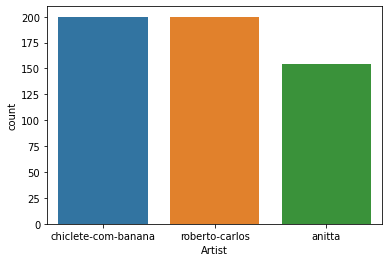

In [50]:
import seaborn as sns

sns.countplot(final.Artist)

# Pipeline

In [51]:
X = final['Lyrics']
y = final.Artist

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.pipeline import Pipeline

dataprep = Pipeline([
    ('count_vectorizer', CountVectorizer(ngram_range=(2,2), max_df=1000, min_df=5)),
    ('tfidf_transformer', TfidfTransformer())
])


pipeline = Pipeline([
    ('dataprep', dataprep),
    ('model', LogisticRegression(max_iter=5000))
])

pipeline.fit(X_train, y_train)

pipeline.predict(X_test)

array(['anitta', 'anitta', 'anitta', 'chiclete-com-banana', 'anitta',
       'anitta', 'chiclete-com-banana', 'anitta', 'anitta',
       'chiclete-com-banana', 'roberto-carlos', 'anitta',
       'chiclete-com-banana', 'roberto-carlos', 'chiclete-com-banana',
       'roberto-carlos', 'roberto-carlos', 'roberto-carlos',
       'chiclete-com-banana', 'roberto-carlos', 'anitta',
       'chiclete-com-banana', 'chiclete-com-banana', 'roberto-carlos',
       'anitta', 'chiclete-com-banana', 'chiclete-com-banana',
       'roberto-carlos', 'roberto-carlos', 'chiclete-com-banana',
       'anitta', 'roberto-carlos', 'chiclete-com-banana', 'anitta',
       'chiclete-com-banana', 'anitta', 'anitta', 'roberto-carlos',
       'roberto-carlos', 'roberto-carlos', 'roberto-carlos', 'anitta',
       'anitta', 'anitta', 'anitta', 'roberto-carlos', 'anitta', 'anitta',
       'roberto-carlos', 'chiclete-com-banana', 'chiclete-com-banana',
       'anitta', 'anitta', 'chiclete-com-banana', 'chiclete-com-banan

In [124]:
pd.DataFrame(zip(X_test, pipeline.predict(X_test), y_test))

,0,1,2
0,Uuh Uuh Uhh Uuh Olha 'cê' me faz tão bem Só d...,anitta,anitta
1,Aí! eu tô maluco Aí! eu tô maluco Sua mulher ...,anitta,chiclete-com-banana
2,"Sei lá, o que será que você tem Só sei que iss...",anitta,anitta
3,Na mistura da cor Tabuleiro de damas No gingad...,chiclete-com-banana,chiclete-com-banana
4,"Atención, formación, la capitana llegó (Vou fa...",anitta,anitta
...,...,...,...
134,se você 25 Deus te abençoa se você não é Deus ...,roberto-carlos,chiclete-com-banana
135,Tu me haces sentir tan bien Con solo una mirad...,anitta,anitta
136,Quero todo mundo feliz nesse verão Se liberte ...,chiclete-com-banana,chiclete-com-banana
137,Yeah-eh Yeah-eh (Prince Royce) Ro-Ro-Ro-Royce ...,roberto-carlos,anitta


In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
pd.DataFrame(
    confusion_matrix(y_test, pipeline.predict(X_test)),
    index=pipeline.classes_,
    columns=pipeline.classes_)

,anitta,chiclete-com-banana,roberto-carlos
anitta,33,7,5
chiclete-com-banana,4,35,9
roberto-carlos,2,9,35


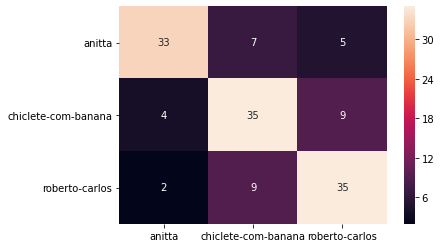

In [58]:
sns.heatmap(
    pd.DataFrame(
    confusion_matrix(y_test, pipeline.predict(X_test)),
    index=pipeline.classes_,
    columns=pipeline.classes_),
    annot=True)

## Distance between songs - find most similar songs given artist

In [59]:
from scipy.spatial.distance import pdist, squareform

In [60]:
count_vectorizer = CountVectorizer(ngram_range=(2,2), max_df=1000, min_df=5)
tfidf_transformer = TfidfTransformer()

transformed_vector = count_vectorizer.fit_transform(final.Lyrics)
transformed_vector = tfidf_transformer.fit_transform(transformed_vector)

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid_vect = TfidfVectorizer(ngram_range=(2,2), max_df=1000, min_df=5)
transformed_vector = tfid_vect.fit_transform(final.Lyrics)

In [69]:
transformed_vector.toarray().shape

(554, 1064)

In [111]:
distances = pd.DataFrame(
    squareform(
    pdist(transformed_vector.toarray(), 
          metric='correlation'))).fillna(2)

In [130]:
similarities = 1 / ( 1 + distances )

In [113]:
similarities_between_chiclete_and_rc = similarities.loc[0:199, 200:399]

In [114]:
similarities_between_rc_and_anitta = similarities.loc[200:399, 400::]

In [131]:
similarities_between_rc_and_anitta.max().sort_values()

428    0.499494
510    0.510569
459    0.511792
414    0.511792
451    0.513319
         ...   
550    0.683174
484    0.721392
437    0.781129
410    0.838417
542    0.847887
Length: 154, dtype: float64

In [115]:
most_similar_song = similarities_between_rc_and_anitta.max().sort_values().index[-1]

In [116]:
most_similar_song


542

In [117]:
similarities_between_rc_and_anitta.loc[:]

,400,401,402,403,404,405,406,407,408,409,...,544,545,546,547,548,549,550,551,552,553
200,0.498706,0.498013,0.498208,0.498783,0.498088,0.498991,0.498497,0.498793,0.498081,0.498455,...,0.497553,0.497406,0.499342,0.498722,0.497483,0.498154,0.498925,0.498535,0.498370,0.498133
201,0.495474,0.511419,0.495467,0.498576,0.495986,0.496465,0.494748,0.495776,0.493309,0.503753,...,0.503534,0.527803,0.497692,0.526796,0.513567,0.499601,0.496237,0.497946,0.494307,0.499182
202,0.495858,0.507175,0.494277,0.496102,0.493894,0.496766,0.499880,0.496134,0.493874,0.505536,...,0.500467,0.498535,0.499729,0.502041,0.506263,0.494106,0.496557,0.504829,0.494788,0.501534
203,0.497609,0.517250,0.496692,0.499866,0.496470,0.498135,0.497224,0.497769,0.496458,0.541619,...,0.498890,0.500496,0.500150,0.509608,0.500400,0.496593,0.498014,0.497293,0.499141,0.496553
204,0.498198,0.497234,0.497506,0.498304,0.497338,0.498594,0.497907,0.498319,0.497329,0.497848,...,0.496594,0.522684,0.499084,0.513006,0.496498,0.497431,0.498503,0.497959,0.497730,0.497401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.498460,0.497635,0.497868,0.513361,0.497724,0.498799,0.498211,0.498563,0.497716,0.498160,...,0.497088,0.496914,0.499217,0.498478,0.497005,0.497803,0.498721,0.498256,0.498059,0.497778
396,0.497417,0.497842,0.496427,0.497569,0.511638,0.497984,0.497001,0.497590,0.496174,0.500338,...,0.495125,0.521697,0.498685,0.497448,0.503590,0.496319,0.497854,0.506991,0.499018,0.503060
397,0.496614,0.517126,0.499376,0.496814,0.499026,0.497357,0.497439,0.496840,0.494989,0.495960,...,0.518072,0.539141,0.499496,0.500717,0.513947,0.500136,0.497186,0.498291,0.495738,0.500279
398,0.577342,0.496822,0.497134,0.498051,0.501502,0.502014,0.499822,0.498068,0.596663,0.501526,...,0.496088,0.495855,0.498947,0.497954,0.495978,0.497048,0.498280,0.497655,0.533941,0.497014


In [118]:
similarities_between_rc_and_anitta.idxmax().loc[most_similar_song]

394

In [119]:
final.reset_index().loc[[394, 542], :]

,index,Lyrics,Artist
394,82,Todo o tempo que eu vivi Procurando meu caminh...,roberto-carlos
542,68,This was never the way I planned not my intent...,anitta


In [120]:
similarities_between_chiclete_and_rc.idxmax()

200    155
201     97
202    134
203    188
204     28
      ... 
395    155
396    127
397    152
398     66
399    129
Length: 200, dtype: int64

In [121]:
most_similar_song = similarities_between_chiclete_and_rc.max().sort_values().index[-1]
print(most_similar_song)
print(similarities_between_chiclete_and_rc.idxmax().loc[most_similar_song])

final.reset_index().loc[[most_similar_song, 
                         similarities_between_chiclete_and_rc.idxmax().loc[most_similar_song]], :]

330
183


,index,Lyrics,Artist
330,337,Oh! Meu Menino Jesus Na noite desse Natal São ...,roberto-carlos
183,0,"Ê, ê, ê, ê, ô Ê, ê, ê... ê, ô, ê, ô Vem O amo...",chiclete-com-banana


In [123]:
final.reset_index().loc[[most_similar_song, 
                         similarities_between_chiclete_and_rc.idxmax().loc[most_similar_song]], :].Lyrics.values

array(['Oh! Meu Menino Jesus Na noite desse Natal São as estrelas que brilham no céu Do seu amor um sinal  Que em toda casa a alegria Seja pra todos igual Brisa de flor perfumando o jardim Chuva de amor no quintal  E nessa noite feliz Noite de paz e de amor Todos veremos no céu A estrela do Salvador  Te peço Menino Jesus Ponha na mesa de alguém O que esse alguém sempre quis e não tem Felicidade também  Lá, lá, lá, lá, lá, lá, lá, lá, lá, lá, lá Lá, lá, lá, lá, lá, lá, lá, lá Lá, lá, lá, lá, lá, lá, lá, lá, lá, lá, lá Lá, lá, lá, lá, lá, lá, lá, lá, lá  Que em toda casa a alegria Seja pra todos igual Brisa de flor perfumando o jardim Chuva de amor no quintal  E nessa noite feliz Noite de paz e de amor Todos veremos no céu A estrela do Salvador  Te peço Menino Jesus Ponha na mesa de alguém O que esse alguém sempre quis e não tem Felicidade também... Felicidade também... Felicidade também  Lá, lá, lá, lá, lá, lá, lá, lá, lá, lá, lá Lá, lá, lá, lá, lá, lá, lá, lá Lá, lá, lá, lá, lá, lá, lá